In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import charset_normalizer as chz
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks/starbucks.csv


In [3]:
df = pd.read_csv('/kaggle/input/starbucks/starbucks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [4]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


some columns aren't in the appropriate datatype; the last 5 columns.

In [5]:
last_5 = df.columns[-5:-1]
for i in last_5:
    print(i)
    df[i] = df[i].map((lambda col: col.strip('%')))

Vitamin A (% DV) 
Vitamin C (% DV)
 Calcium (% DV) 
Iron (% DV) 


In [6]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0,75


In [7]:
#converting the data-types
for i in last_5:
    df[i]=df[i].astype('float64')

In [8]:
df.head(2)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260


In [9]:
df.describe(include='all')

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
count,242,242,242,242.000000,242,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,241
unique,9,33,13,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
top,Classic Espresso Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Soymilk,NaN,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75
freq,58,12,66,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37
mean,NaN,NaN,NaN,193.871901,NaN,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512,9.830579,3.648760,20.756198,7.446281,NaN
std,NaN,NaN,NaN,102.863303,NaN,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659,8.097962,14.421794,14.542343,10.486467,NaN
min,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,120.000000,NaN,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000,4.000000,0.000000,10.000000,0.000000,NaN
50%,NaN,NaN,NaN,185.000000,NaN,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000,8.000000,0.000000,20.000000,2.000000,NaN
75%,NaN,NaN,NaN,260.000000,NaN,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000,15.000000,0.000000,30.000000,10.000000,NaN


There are 9 unique beverage categories.

In [10]:
df[df.columns[-1]].value_counts()
#the column is categorical

Caffeine (mg)
75        37
0         35
150       34
70        14
varies    12
95        11
Varies    10
110        9
130        7
25         6
120        6
90         4
175        4
20         3
125        3
10         3
145        3
50         3
100        3
140        3
55         3
80         3
180        3
85         3
30         3
15         3
170        3
165        2
410        1
235        1
330        1
225        1
260        1
300        1
65         1
105        1
Name: count, dtype: int64

Text(0.5, 1.0, 'Beverage_category')

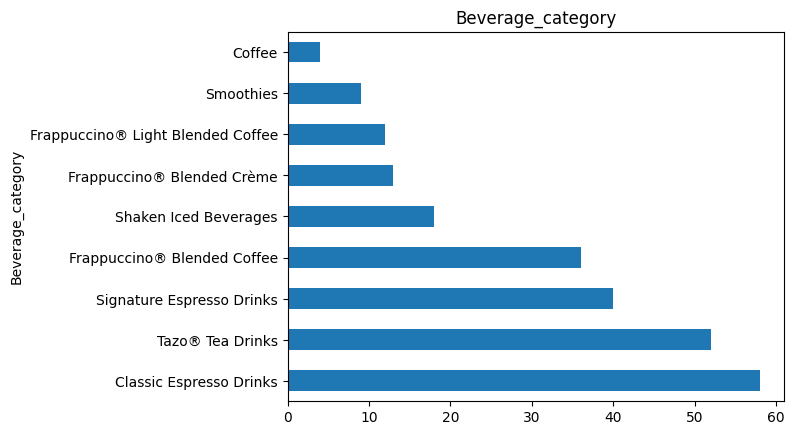

In [11]:
cols = df.columns
df[cols[0]].value_counts().plot.barh()
plt.title(cols[0])

Text(0.5, 1.0, 'Beverage_prep')

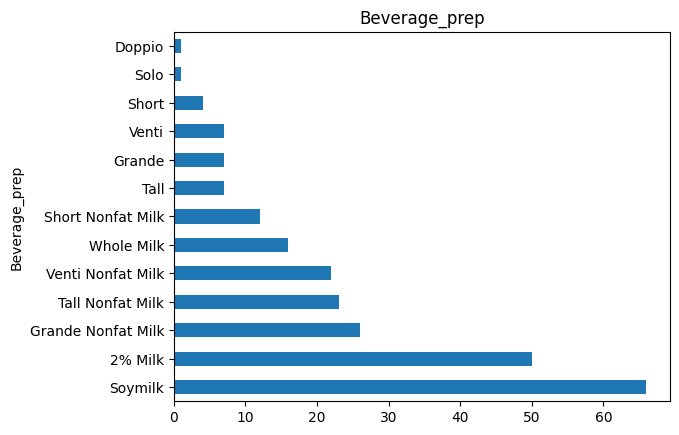

In [12]:
df[cols[2]].value_counts().plot.barh()
plt.title(cols[2])

In [13]:
freq = pd.crosstab(df[cols[0]],df[cols[2]])
freq

Beverage_prep,2% Milk,Doppio,Grande,Grande Nonfat Milk,Short,Short Nonfat Milk,Solo,Soymilk,Tall,Tall Nonfat Milk,Venti,Venti Nonfat Milk,Whole Milk
Beverage_category,,,,,,,,,,,,,
Classic Espresso Drinks,16,1,1,5,1,5,1,16,1,5,1,5,0
Coffee,0,0,1,0,1,0,0,0,1,0,1,0,0
Frappuccino® Blended Coffee,0,0,0,4,0,0,0,12,0,4,0,4,12
Frappuccino® Blended Crème,0,0,0,2,0,0,0,4,0,2,0,1,4
Frappuccino® Light Blended Coffee,0,0,0,4,0,0,0,0,0,4,0,4,0
Shaken Iced Beverages,3,0,3,1,0,0,0,3,3,1,3,1,0
Signature Espresso Drinks,12,0,1,3,1,3,0,12,1,3,1,3,0
Smoothies,3,0,0,3,0,0,0,3,0,0,0,0,0
Tazo® Tea Drinks,16,0,1,4,1,4,0,16,1,4,1,4,0


In [14]:
chi2,pval,ddof,expected = chi2_contingency(freq)
chi2

212.37679958499197

In [15]:
pval

8.795997350935952e-11

The pval is much lower than 0.05; there most likely is an association between 'beverage_category' and 'beverage_prep'.
This typically means that the observed distribution of the data is unlikely to have occurred by chance, and there is evidence to reject the null hypothesis of independence.

chi2_contingency is a tool to assess whether the observed distribution of categorical variables is significantly different from what would be expected if the variables were independent. If the p-value is low, you have evidence to suggest that the variables are associated.

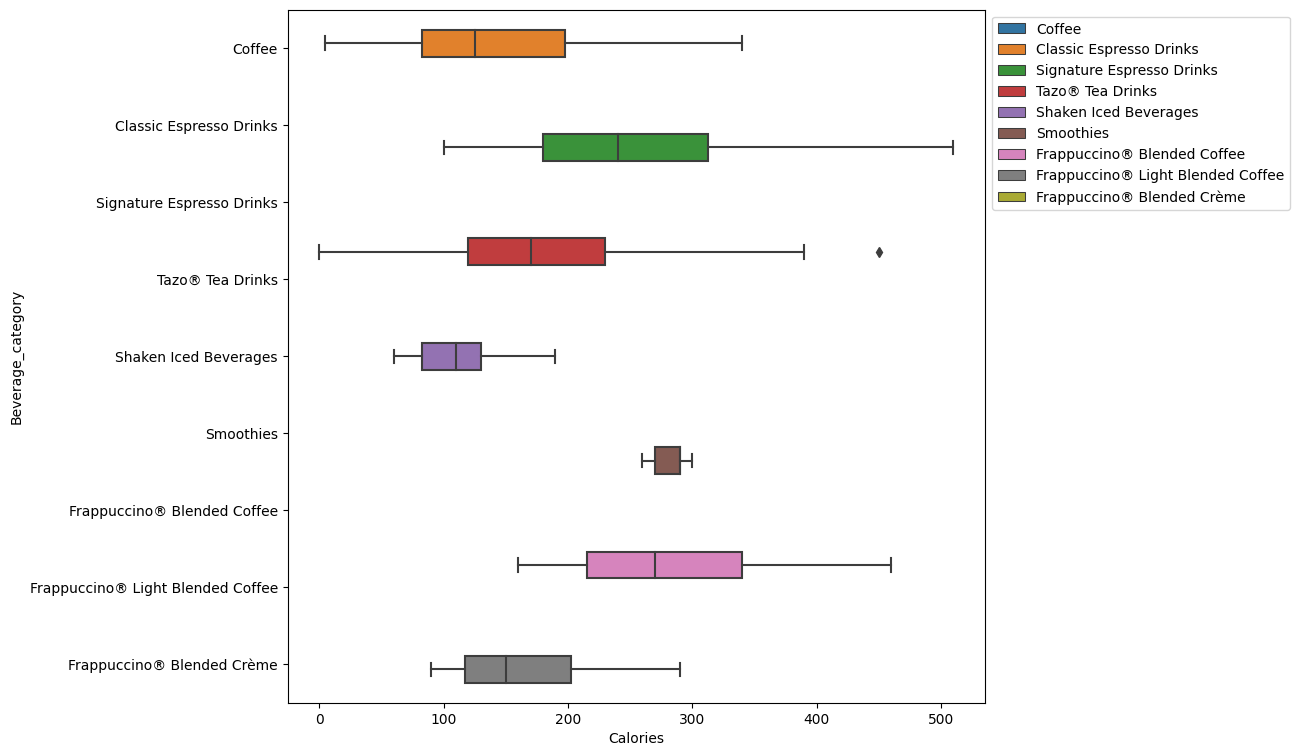

In [16]:
plt.figure(figsize=(9,9))
sns.boxplot(y=df[cols[0]],x=df[cols[3]],width=3.2, hue=df[cols[0]])
plt.legend(bbox_to_anchor=(1,1))

'classic expresso drinks' has the most calories on average; it also has the highest range of calories.

In [17]:
df.head(1)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175


<Axes: ylabel='Caffeine (mg)'>

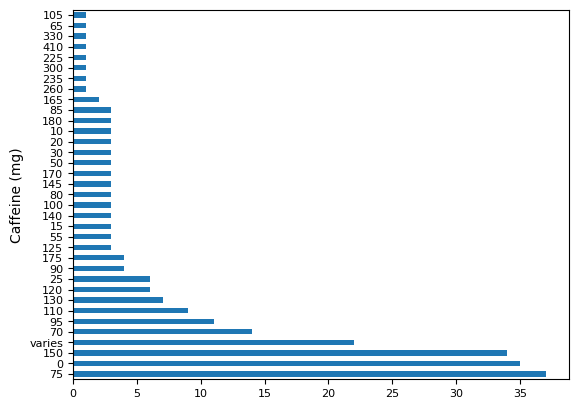

In [18]:
df[cols[-1]] = df[cols[-1]].map(lambda a: 'varies' if a=='Varies'else a)
df[cols[-1]].value_counts().plot.barh(fontsize=8)

Removing entry 'varies' in the column as it hinders the further analysis

In [19]:
df[cols[-1]] = df[cols[-1]].map(lambda a: None if a=='varies' else a)
df[cols[-1]].dropna(inplace=True)

In [20]:
df[cols[-1]].value_counts()

Caffeine (mg)
75     37
0      35
150    34
70     14
95     11
110     9
130     7
25      6
120     6
90      4
175     4
10      3
125     3
145     3
30      3
100     3
50      3
140     3
180     3
55      3
80      3
85      3
20      3
15      3
170     3
165     2
410     1
235     1
330     1
260     1
225     1
300     1
65      1
105     1
Name: count, dtype: int64

Segmenting the column into ranges

In [21]:
df[cols[-1]].isnull().sum()

23

Removing the 23 null entries

In [22]:
df.dropna(subset=[cols[-1]],inplace=True)

In [23]:
df[cols[-1]].isnull().sum()
#Removed all null entries

0

In [24]:
df[cols[-1]].value_counts(dropna=False)

Caffeine (mg)
75     37
0      35
150    34
70     14
95     11
110     9
130     7
25      6
120     6
90      4
175     4
10      3
125     3
145     3
30      3
100     3
50      3
140     3
180     3
55      3
80      3
85      3
20      3
15      3
170     3
165     2
410     1
235     1
330     1
260     1
225     1
300     1
65      1
105     1
Name: count, dtype: int64

In [25]:
df[cols[-1]] = df[cols[-1]].astype(int)

In [26]:
bins = list(range(0,451,50))
labels= ['0-50','50-100','100-150','150-200','200-250','250-300','300-350','350-400','400-450']
df['caffeine_range'] = pd.cut(df[cols[-1]],bins=bins,labels=labels)

In [27]:
df['caffeine_range'].value_counts()

caffeine_range
50-100     79
100-150    66
0-50       21
150-200    12
200-250     2
250-300     2
300-350     1
400-450     1
350-400     0
Name: count, dtype: int64

In [28]:
df['Caffeine (mg)'].value_counts(dropna=False)

Caffeine (mg)
75     37
0      35
150    34
70     14
95     11
110     9
130     7
25      6
120     6
90      4
175     4
10      3
125     3
145     3
30      3
100     3
50      3
140     3
180     3
55      3
80      3
85      3
20      3
15      3
170     3
165     2
410     1
235     1
330     1
260     1
225     1
300     1
65      1
105     1
Name: count, dtype: int64

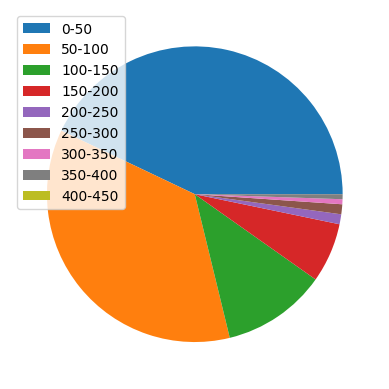

In [29]:
df['caffeine_range'].value_counts().plot.pie(labels=None)
plt.ylabel('')
plt.legend(labels,loc='best')

<Axes: xlabel='count', ylabel='caffeine_range'>

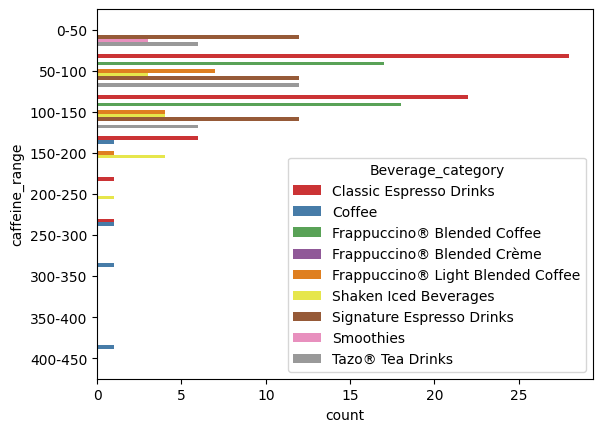

In [39]:
grouped = df.groupby(cols[0])['caffeine_range'].value_counts().reset_index()
sns.set_palette('Set1')
sns.barplot(data=grouped,width=0.8,y='caffeine_range',x='count',hue='Beverage_category')

Classic Expresso Drinks have beverages with different caffeine levels.

In [45]:
numerical = df.select_dtypes(exclude=['object','category'])

Text(0.5, 1.0, 'Correlations')

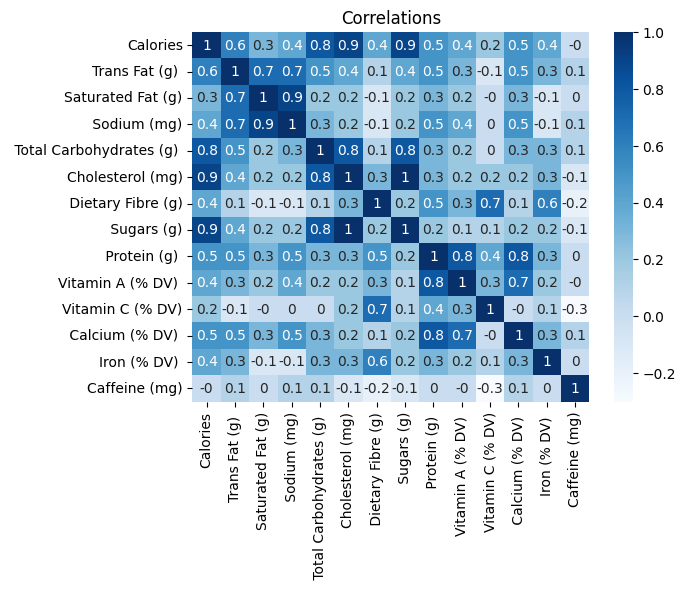

In [55]:
sns.heatmap(numerical.corr().round(1),cmap='Blues',annot=True)
plt.title('Correlations')

The closer to 1 as is indicated in the color map, the stronger the correlation and the closer to 0, the weaker the correlation.
This means that as one variable increases, the other increases but the strength of this relationship is dependent on the correlation score.